In [1]:
import numpy as np
import nibabel as nib
import os
import matplotlib.pyplot as plt
import pandas as pd
from convert_fm import convert_img_ppm_to_Hz_data, convert_ppm_data_to_Hz_data
from demod import demod_pls
from extract_metric import extract_metrics

# <span style="color:orange"> *db0_033 processing* </span> 

In [2]:
path_to_fms = "E:/msc_data/ismrm_2025/dB0_033_dup1/fm/sim/fms"
path_to_dmod_mask = "E:/msc_data/ismrm_2025/dB0_033_dup1/fm/sim/D2_D3_masks/cord_mask.nii.gz"
path_to_labeled_cord = "E:/msc_data/ismrm_2025/dB0_033_dup1/fm/sim/D2_D3_masks/cord_mask_labeled.nii.gz"
path_to_metrics = "E:/msc_data/ismrm_2025/dB0_033_dup1/fm/sim/D4_metrics"
path_to_dmod_folder = "E:/msc_data/ismrm_2025/dB0_033_dup1/fm/sim/V1_dmod_sim"

## Measured B0 - Inspiration & Expiration

### <span style="color:green"> Expiration </span> 

In [3]:
path_to_exp_meas = "E:/msc_data/ismrm_2025/dB0_033_dup1/fm/C1_meas/exp/tests/test1/B0.nii"
path_to_exp_dmod_mask = "E:/msc_data/ismrm_2025/dB0_033_dup1/fm/processing_steps/D1_D2_label_vert/exp/cord_mask.nii.gz"
path_to_exp_metric_mask = "E:/msc_data/ismrm_2025/dB0_033_dup1/fm/processing_steps/D1_D2_label_vert/exp/cord_mask_labeled.nii.gz"

In [4]:
# Load images and get nifti data to manipulate!
exp_B0_meas_img = nib.load(path_to_exp_meas)
exp_B0_meas_data = exp_B0_meas_img.get_fdata()

exp_dmod_mask_img = nib.load(path_to_exp_dmod_mask)
exp_dmod_mask_data = exp_dmod_mask_img.get_fdata()

exp_metric_mask_img = nib.load(path_to_exp_metric_mask)
exp_metric_mask_data = exp_metric_mask_img.get_fdata()

In [5]:
exp_dmod_value = np.mean(exp_B0_meas_data[exp_dmod_mask_data==1])
print("Expiration demod value: ",exp_dmod_value," Hz")

Expiration demod value:  286.7117539335603  Hz


In [6]:
exp_dmod_B0_meas = exp_B0_meas_data - exp_dmod_value
# Create nifti and save
exp_dmod_B0_meas_img = nib.Nifti1Image(exp_dmod_B0_meas, affine = exp_B0_meas_img.affine)
path_to_exp_dmod_fm = "E:/msc_data/ismrm_2025/dB0_033_dup1/fm/C_dmod_meas/exp/exp_dmod_B0_meas.nii.gz"
nib.save(exp_dmod_B0_meas_img,path_to_exp_dmod_fm)

In [10]:
# Extract metrics, plot and save value
path_to_exp_dmod_fm = "E:/msc_data/ismrm_2025/dB0_033_dup1/fm/C_dmod_meas/exp/exp_dmod_B0_meas.nii.gz"
exp_B0_metrics_path =  "E:/msc_data/ismrm_2025/dB0_033_dup1/fm/C_dmod_meas/exp/exp_metrics_test.csv"
extract_metrics(path_to_exp_dmod_fm, path_to_exp_dmod_mask, path_to_exp_metric_mask, exp_B0_metrics_path, method='wa', vert="4:14")

Metrics extracted successfully: 
--
Spinal Cord Toolbox (6.5)

sct_extract_metric -i E:/msc_data/ismrm_2025/dB0_033_dup1/fm/C_dmod_meas/exp/exp_dmod_B0_meas.nii.gz -f E:/msc_data/ismrm_2025/dB0_033_dup1/fm/processing_steps/D1_D2_label_vert/exp/cord_mask.nii.gz -method wa -vert 4:14 -vertfile E:/msc_data/ismrm_2025/dB0_033_dup1/fm/processing_steps/D1_D2_label_vert/exp/cord_mask_labeled.nii.gz -perlevel 1 -o E:/msc_data/ismrm_2025/dB0_033_dup1/fm/C_dmod_meas/exp/exp_metrics_test.csv
--


Load metric image...
Estimation for label: cord_mask

Done! To view results, type:
start E:/msc_data/ismrm_2025/dB0_033_dup1/fm/C_dmod_meas/exp/exp_metrics_test.csv




In [12]:
exp_B0_metrics_path =  "E:/msc_data/ismrm_2025/dB0_033_dup1/fm/C_dmod_meas/exp/exp_metrics_test.csv"
exp_metrics_df = pd.read_csv(exp_B0_metrics_path)
exp_metrics_data = exp_metrics_df['WA()']
exp_metrics_data = exp_metrics_data[::-1]
exp_metrics_data

10   -104.903085
9     -52.632774
8       7.312257
7      82.732032
6     118.993209
5      92.495091
4      72.811925
3      80.455386
2      87.574000
1      85.216214
0      65.690197
Name: WA(), dtype: float64

### <span style="color:red"> Inspiration </span> 

In [13]:
path_to_insp_meas = "E:/msc_data/ismrm_2025/dB0_033_dup1/fm/C1_meas/insp/tests/test1/B0.nii"
path_to_insp_dmod_mask = "E:/msc_data/ismrm_2025/dB0_033_dup1/fm/processing_steps/D1_D2_label_vert/insp/cord_mask.nii.gz"
path_to_insp_metric_mask = "E:/msc_data/ismrm_2025/dB0_033_dup1/fm/processing_steps/D1_D2_label_vert/insp/cord_mask_labeled.nii.gz"

In [14]:
# Load images and get nifti data to manipulate!
insp_B0_meas_img = nib.load(path_to_insp_meas)
insp_B0_meas_data = insp_B0_meas_img.get_fdata()

insp_dmod_mask_img = nib.load(path_to_insp_dmod_mask)
insp_dmod_mask_data = insp_dmod_mask_img.get_fdata()

insp_metric_mask_img = nib.load(path_to_insp_metric_mask)
insp_metric_mask_data = insp_metric_mask_img.get_fdata()

In [15]:
insp_dmod_value = np.mean(insp_B0_meas_data[insp_dmod_mask_data==1])
print("Inspiration demod value: ",insp_dmod_value," Hz")

Inspiration demod value:  -251.19584863446968  Hz


In [14]:
insp_dmod_B0_meas = insp_B0_meas_data - insp_dmod_value
# Create nifti and save
insp_dmod_B0_meas_img = nib.Nifti1Image(insp_dmod_B0_meas, affine = insp_B0_meas_img.affine)
path_to_insp_dmod_fm = "E:/msc_data/ismrm_2025/dB0_033_dup1/fm/C_dmod_meas/insp/insp_dmod_B0_meas.nii.gz"
nib.save(insp_dmod_B0_meas_img, path_to_insp_dmod_fm)

In [16]:
path_to_insp_dmod_fm = "E:/msc_data/ismrm_2025/dB0_033_dup1/fm/C_dmod_meas/insp/insp_dmod_B0_meas.nii.gz"
insp_B0_metrics_path = "E:/msc_data/ismrm_2025/dB0_033_dup1/fm/C_dmod_meas/insp/insp_metrics.csv"
extract_metrics(path_to_insp_dmod_fm, path_to_insp_dmod_mask, path_to_insp_metric_mask, insp_B0_metrics_path, method='wa', vert="4:14")

Metrics extracted successfully: 
--
Spinal Cord Toolbox (6.5)

sct_extract_metric -i E:/msc_data/ismrm_2025/dB0_033_dup1/fm/C_dmod_meas/insp/insp_dmod_B0_meas.nii.gz -f E:/msc_data/ismrm_2025/dB0_033_dup1/fm/processing_steps/D1_D2_label_vert/insp/cord_mask.nii.gz -method wa -vert 4:14 -vertfile E:/msc_data/ismrm_2025/dB0_033_dup1/fm/processing_steps/D1_D2_label_vert/insp/cord_mask_labeled.nii.gz -perlevel 1 -o E:/msc_data/ismrm_2025/dB0_033_dup1/fm/C_dmod_meas/insp/insp_metrics.csv
--


Load metric image...
Estimation for label: cord_mask

Done! To view results, type:
start E:/msc_data/ismrm_2025/dB0_033_dup1/fm/C_dmod_meas/insp/insp_metrics.csv




In [17]:
insp_B0_metrics_path = "E:/msc_data/ismrm_2025/dB0_033_dup1/fm/C_dmod_meas/insp/insp_metrics.csv"
insp_metrics_df = pd.read_csv(insp_B0_metrics_path)
insp_metrics_data = insp_metrics_df['WA()']
insp_metrics_data = insp_metrics_data[::-1]
insp_metrics_data

10   -116.873735
9     -53.993132
8      21.573222
7     104.863748
6     135.128111
5      67.438657
4      22.028257
3      10.687637
2      10.522335
1      11.893407
0       5.928425
Name: WA(), dtype: float64

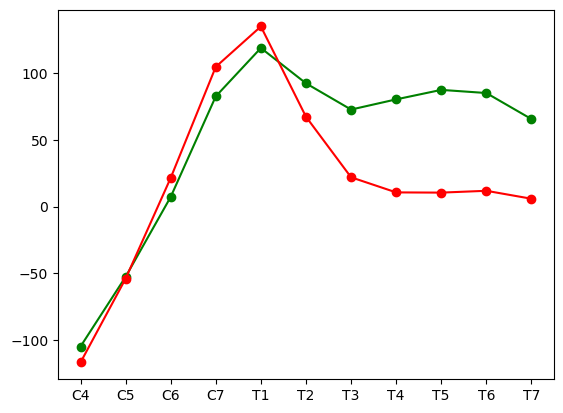

In [19]:
vertebrae_levels = [ 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'] # From 4 to 14
plt.plot(vertebrae_levels, exp_metrics_data, marker = 'o', linestyle = '-', label = "dmod Exp B0 measured", color = "green")
plt.plot(vertebrae_levels, insp_metrics_data, marker = 'o', linestyle = '-', label = "dmod Insp B0 measured", color = "red")

### <span style="color:#C28AD1"> Average Insp and Exp </span> 

In [20]:
avg_respiration = (exp_metrics_data+ insp_metrics_data )/2
avg_respiration

10   -110.888410
9     -53.312953
8      14.442740
7      93.797890
6     127.060660
5      79.966874
4      47.420091
3      45.571511
2      49.048168
1      48.554811
0      35.809311
Name: WA(), dtype: float64

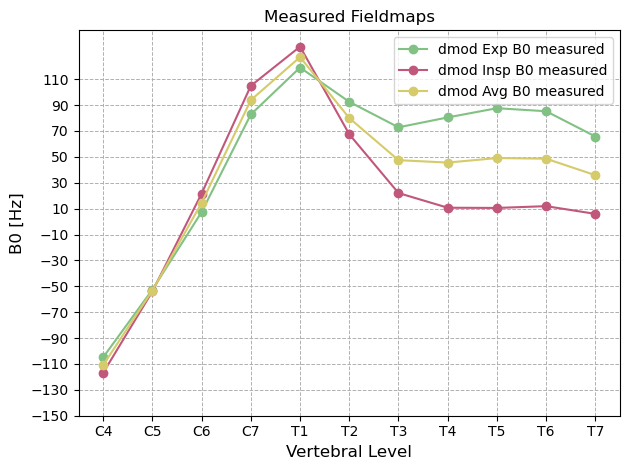

In [25]:
vertebrae_levels = ['C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'] # From 3 to 14
plt.plot(vertebrae_levels, exp_metrics_data, marker = 'o', linestyle = '-', label = "dmod Exp B0 measured", color = "#81C184")
plt.plot(vertebrae_levels, insp_metrics_data, marker = 'o', linestyle = '-', label = "dmod Insp B0 measured", color = "#C1577B")
plt.plot(vertebrae_levels, avg_respiration, marker = 'o', linestyle = '-', label = "dmod Avg B0 measured", color = "#D5CB6A")

plt.title("Measured Fieldmaps")
plt.xlabel('Vertebral Level', fontsize=12)
plt.ylabel('B0 [Hz]', fontsize=12)
plt.legend()
# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

yticks = range(-150, 121, 20) 
plt.yticks(yticks)

# Show the plot
plt.show()


In [22]:
# Export average!
avg_respiration.to_csv("E:/msc_data/ismrm_2025/dB0_033_dup1/fm/C_dmod_meas/simple_avg_respiration.csv" , index = False, header = True)

### Simualted FM loading, demod, extract metric and plot! </br>
Here we bring the data from the simulation with an initial assumption of chi value for trachea and lung </br>
This helps confirm the shape of the curves and the dimension of the graphs

In [28]:
from utils.show_slice import display_nifti_slice
from convert_fm import convert_ppm_data_to_Hz_data
from extract_metric import extract_metrics
import re

In [29]:
dmod_mask_img = nib.load(path_to_dmod_mask)
dmod_mask_data = dmod_mask_img.get_fdata()

metric_mask_img = nib.load(path_to_labeled_cord)
metric_mask_data = metric_mask_img.get_fdata()



In [32]:
curr_fm = nib.load(os.path.join(path_to_fms,"dB0_033_sim_fm_ppm.nii.gz"))
curr_fm_data = curr_fm.get_fdata()

sim_dmod_value = np.mean(curr_fm_data[dmod_mask_data==1])
print("Demod value for sim_fm:", sim_dmod_value)

curr_dmod_fm_ppm = curr_fm_data - sim_dmod_value
dmod_fm_Hz = convert_ppm_data_to_Hz_data(curr_dmod_fm_ppm,3)


dmod_save_path = os.path.join(path_to_dmod_folder,"initial_dmod_sim_fm.nii.gz")
dmod_fm_img = nib.Nifti1Image(dmod_fm_Hz, affine = curr_fm.affine)
nib.save(dmod_fm_img,dmod_save_path)
outfn = os.path.join(path_to_metrics,"initial_dmod_sim_fm.csv")
extract_metrics(dmod_save_path, path_to_dmod_mask, path_to_labeled_cord, outfn, method='wa', vert="4:14")

sim_metric_df = pd.read_csv(outfn)

sim_metric_values = sim_metric_df['WA()']
sim_metric_values = sim_metric_values[::-1]




Demod value for sim_fm: -3.0527928393537147
Metrics extracted successfully: 
--
Spinal Cord Toolbox (6.5)

sct_extract_metric -i E:/msc_data/ismrm_2025/dB0_033_dup1/fm/sim/V1_dmod_sim\initial_dmod_sim_fm.nii.gz -f E:/msc_data/ismrm_2025/dB0_033_dup1/fm/sim/D2_D3_masks/cord_mask.nii.gz -method wa -vert 4:14 -vertfile E:/msc_data/ismrm_2025/dB0_033_dup1/fm/sim/D2_D3_masks/cord_mask_labeled.nii.gz -perlevel 1 -o E:/msc_data/ismrm_2025/dB0_033_dup1/fm/sim/D4_metrics\initial_dmod_sim_fm.csv
--


Load metric image...
Estimation for label: cord_mask

Done! To view results, type:
start E:/msc_data/ismrm_2025/dB0_033_dup1/fm/sim/D4_metrics\initial_dmod_sim_fm.csv




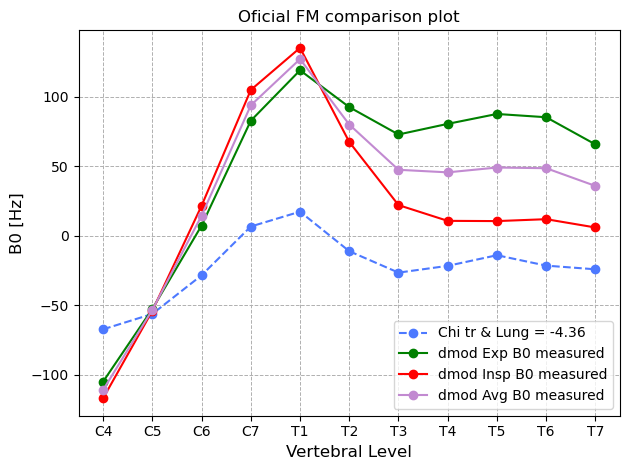

In [33]:
plt.plot(vertebrae_levels, sim_metric_values, marker = 'o', linestyle = '--', label = "Chi tr & Lung = -4.36", color = "#4d79ff")

# Copy and paste plot on top here:
plt.plot(vertebrae_levels, exp_metrics_data, marker = 'o', linestyle = '-', label = "dmod Exp B0 measured", color = "green")
plt.plot(vertebrae_levels, insp_metrics_data, marker = 'o', linestyle = '-', label = "dmod Insp B0 measured", color = "red")
plt.plot(vertebrae_levels, avg_respiration, marker = 'o', linestyle = '-', label = "dmod Avg B0 measured", color = "#C28AD1")

plt.title("Oficial FM comparison plot")
plt.xlabel('Vertebral Level', fontsize=12)
plt.ylabel('B0 [Hz]', fontsize=12)
plt.legend()
# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# Testing new demodulation approach </br>
Done to one subject only to test the hypothesis: </br>
The absolute frequency is: 

### <span style="color:green"> Expiration* </span> </br>
The difference is now we need to get the central frequency value from the json sidecars </br>
For expiration: 123.249489 Hz

The frequency shift of an MR image is given by: deltaF / F0 </br>
F0 is the resonating frequency of spins at the defined Tesla </br>
Recall the gyromagnetic ratio in [Hz/Tesla] is 42.58 1e6 for Hydrogen nuclei </br>
If you don't use the 1e6 in calculations, the final value will be in [ppm]

In [42]:
# For example, at 1.5 T 1000 Hz difference [-500, 500] is equal to:
500 / (1.5 * 42.58)
# in [ppm]
central_freq = 123.249489

In [41]:
water_ppm =  -9.05
water_Hz_3T = water_ppm * 3 * 42.58
print("Frequency of water at 3T: ", water_Hz_3T, "Hz")

Frequency of water at 3T:  -1156.047 Hz


In [43]:
water_dmod = exp_metrics_data - water_Hz_3T - central_freq

In [44]:
# Load chi map
og_chimap = nib.load(r"E:\msc_data\ismrm_2025\dB0_033_dup1\fm\sim\B1_chi_maps/dB0_033_mod0.nii.gz")
og_chimap_data = og_chimap.get_fdata()

water_sim_dmod = og_chimap_data - (water_ppm)

#Now simulate fieldmap and load
water_sim_dmod_chimap = nib.Nifti1Image(water_sim_dmod, affine = og_chimap.affine)
outpath = r"E:\msc_data\ismrm_2025\dB0_033_dup1\fm\sim\B1_chi_maps/dB0_033_dmod_water.nii.gz"
nib.save(water_sim_dmod_chimap, outpath)

In [ ]:
# Load it
dmod_sim_fm_ppm = r"E:\msc_data\ismrm_2025\dB0_033_dup1\fm\sim\B1_chi_maps/custom_dmod_water_fm_ppm.nii.gz"
dmod_sim_fm_Hz = dmod_sim_fm_ppm * 3 * 42.58

### <span style="color:red"> Inspiration </span> 
The difference is now we need to get the central frequency value from the json sidecars </br>
For expiration: 123.249489 Hz